# Phase Modulation Sideband Spectrum

Modulation Frequency: 0.01THz
	Electric Field = 101015.254 V/m
	Modulation index = 0.195

Modulation Frequency: 0.02THz
	Electric Field = 101015.254 V/m
	Modulation index = -0.051

Modulation Frequency: 0.20THz
	Electric Field = 101015.254 V/m
	Modulation index = -0.008

Modulation Frequency: 0.30THz
	Electric Field = 101015.254 V/m
	Modulation index = -0.007

Modulation Frequency: 0.50THz
	Electric Field = 101015.254 V/m
	Modulation index = -0.003

Modulation Frequency: 1.00THz
	Electric Field = 101015.254 V/m
	Modulation index = -0.002



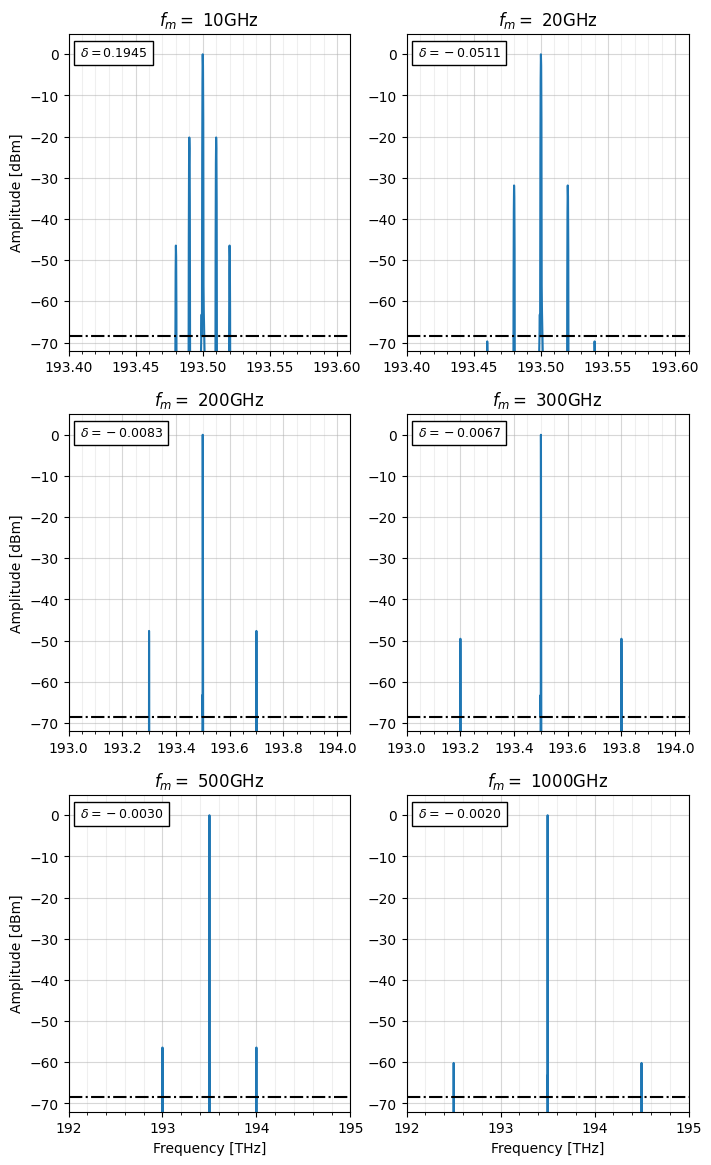

In [1]:
# For relative imports
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import matplotlib.pyplot as plt
import numpy as np
from phase_modulation import modulation, carrier, spectrum, mod_index


fig, ax = plt.subplots(3, 2, figsize=(8, 14))

lims = [(193.4, 193.6), (193, 194), (192, 195)]

major_ticks_x = [
    np.arange(193.4, 193.61, 0.05),
    np.arange(193, 194.1, 0.2),
    np.arange(192, 195.1, 1),
]
minor_ticks_x = [
    np.arange(193.4, 193.61, 0.01),
    np.arange(193, 194.1, 0.05),
    np.arange(192, 195.1, 0.2),
]

mod_freq = [0.01, 0.02, 0.2, 0.3, 0.5, 1]

p_laser_dbm = 0  # dBm
p_laser_mw = np.power(10, p_laser_dbm / 10)  # mW

p_mod_dbm = 10  # dBm
p_mod_mw = np.power(10, p_mod_dbm / 10)

f_car = 193.5  # THz

N = int(5e6)  # Number of samples (time) Ratio of N/T determines resolution
T = 1 / 1000  # Sample period (time (ps)), Determines max freq.
time = np.linspace(0.0, N * T, N)
dt = time[1] - time[0]

dev_len = 6  # mm
d = 7e-6    # electrode separation

E = np.sqrt(p_mod_mw * 50 * 1e-3) / d

for i, f_m in enumerate(mod_freq):

    B = mod_index(f_m, E, dev_len)

    print(f"Modulation Frequency: {f_m:0.2f}THz")
    print(f"\tElectric Field = {E:0.3f} V/m")
    print(f"\tModulation index = {B:0.3f}\n")

    sig = carrier(f_car, time, B, modulation(f_m, time))
    xf, yf = spectrum(sig, N, T)

    dbm = 20 * np.log10(np.abs(yf[0 : N // 2])) + p_laser_dbm

    ax[i//2, i%2].plot(xf[0 : N // 2], dbm)
    ax[i//2, i%2].axhline(-68.5, color="black", linestyle="-.", label="Noise Floor")
    ax[i//2, i%2].set_xlim(lims[i // 2])
    ax[i//2, i%2].set_title(f"$f_m=$ {int(f_m * 1e3):d}GHz")

    if i > 3:
        ax[i//2, i%2].set_xlabel("Frequency [THz]")
    if i % 2 == 0:
        ax[i//2, i%2].set_ylabel("Amplitude [dBm]")
    ax[i//2, i%2].set_ylim((-72, 5))
    ax[i//2, i%2].grid()

    plt.text(
        0.04,
        0.96,
        f"$\delta={B:0.4f}$",
        size=9,
        va="top",
        ha="left",
        bbox=dict(fc="white"),
        transform=ax[i//2, i%2].transAxes,
    )

    c = np.where(np.isclose(xf, [193.5 + f_m], rtol=1e-7))
    c_index = c[0][int(len(c[0]) / 2)]

    ax[i//2, i%2].set_xticks(major_ticks_x[i // 2])
    ax[i//2, i%2].set_xticks(minor_ticks_x[i // 2], minor=True)
    ax[i//2, i%2].grid(which="minor", alpha=0.2)
    ax[i//2, i%2].grid(which="major", alpha=0.5)

plt.show()